In [89]:
import yfinance as yf

tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']

data=yf.download(tickers,period="3y",group_by='ticker', auto_adjust=True)
print("Data",data)

[*********************100%***********************]  5 of 5 completed

Data Ticker            AMZN                                                 \
Price             Open        High         Low       Close     Volume   
Date                                                                    
2022-07-05  107.599998  114.080002  106.320000  113.500000   76583700   
2022-07-06  113.209999  115.480003  112.010002  114.330002   66958900   
2022-07-07  113.849998  116.989998  113.489998  116.330002   57872300   
2022-07-08  114.599998  116.580002  113.690002  115.540001   45719700   
2022-07-11  114.080002  114.300003  110.870003  111.750000   53487600   
...                ...         ...         ...         ...        ...   
2025-06-27  219.919998  223.300003  216.740005  223.300003  119217100   
2025-06-30  223.520004  223.820007  219.119995  219.389999   58887800   
2025-07-01  219.500000  221.880005  217.929993  220.460007   39256800   
2025-07-02  219.729996  221.600006  219.059998  219.919998   30894200   
2025-07-03  221.820007  224.009995  221.360001

In [90]:
##extract closing price for calculation
import pandas as pd
closing_dict={}
for ticker in tickers:
    closing_dict[ticker]=data[ticker]['Close']
    print("closing-dict",closing_dict)
    
closing_prices=pd.DataFrame(closing_dict)

print("closing prices",closing_prices)


closing-dict {'AAPL': Date
2022-07-05    139.324799
2022-07-06    140.663300
2022-07-07    144.039154
2022-07-08    144.718231
2022-07-11    142.582489
                 ...    
2025-06-27    201.080002
2025-06-30    205.169998
2025-07-01    207.820007
2025-07-02    212.440002
2025-07-03    213.550003
Name: Close, Length: 753, dtype: float64}
closing-dict {'AAPL': Date
2022-07-05    139.324799
2022-07-06    140.663300
2022-07-07    144.039154
2022-07-08    144.718231
2022-07-11    142.582489
                 ...    
2025-06-27    201.080002
2025-06-30    205.169998
2025-07-01    207.820007
2025-07-02    212.440002
2025-07-03    213.550003
Name: Close, Length: 753, dtype: float64, 'MSFT': Date
2022-07-05    256.347473
2022-07-06    259.624329
2022-07-07    261.760101
2022-07-08    261.038513
2022-07-11    257.966400
                 ...    
2025-06-27    495.940002
2025-06-30    497.410004
2025-07-01    492.049988
2025-07-02    491.089996
2025-07-03    498.839996
Name: Close, Length: 753

In [91]:
##claculate daily returns 
daily_returns=closing_prices.pct_change()
print("daily-returns",daily_returns)
# remove first row it wwill be NaN
daily_returns=daily_returns.dropna()

daily-returns                 AAPL      MSFT     GOOGL      AMZN      TSLA
Date                                                        
2022-07-05       NaN       NaN       NaN       NaN       NaN
2022-07-06  0.009607  0.012783  0.011557  0.007313 -0.005721
2022-07-07  0.024000  0.008226  0.036754  0.017493  0.055279
2022-07-08  0.004715 -0.002757  0.004803 -0.006791  0.025435
2022-07-11 -0.014758 -0.011769 -0.030808 -0.032803 -0.065480
...              ...       ...       ...       ...       ...
2025-06-27  0.000398 -0.003036  0.028754  0.028464 -0.006600
2025-06-30  0.020340  0.002964 -0.012883 -0.017510 -0.018447
2025-07-01  0.012916 -0.010776 -0.002213  0.004877 -0.053359
2025-07-02  0.022231 -0.001951  0.015924 -0.002449  0.049682
2025-07-03  0.005225  0.015781  0.004982  0.015869 -0.000950

[753 rows x 5 columns]


In [92]:
print(daily_returns)

                AAPL      MSFT     GOOGL      AMZN      TSLA
Date                                                        
2022-07-06  0.009607  0.012783  0.011557  0.007313 -0.005721
2022-07-07  0.024000  0.008226  0.036754  0.017493  0.055279
2022-07-08  0.004715 -0.002757  0.004803 -0.006791  0.025435
2022-07-11 -0.014758 -0.011769 -0.030808 -0.032803 -0.065480
2022-07-12  0.006834 -0.040981 -0.014316 -0.022640 -0.005434
...              ...       ...       ...       ...       ...
2025-06-27  0.000398 -0.003036  0.028754  0.028464 -0.006600
2025-06-30  0.020340  0.002964 -0.012883 -0.017510 -0.018447
2025-07-01  0.012916 -0.010776 -0.002213  0.004877 -0.053359
2025-07-02  0.022231 -0.001951  0.015924 -0.002449  0.049682
2025-07-03  0.005225  0.015781  0.004982  0.015869 -0.000950

[752 rows x 5 columns]


In [93]:
stock_labels={}
for ticker in tickers:
    returns=daily_returns[ticker]
    next_day_returns=returns.shift(-1)
    is_positive = next_day_returns > 0
    labels=is_positive.astype(int)
    labels=labels.dropna()
    print(labels)
    stock_labels[ticker]=labels



Date
2022-07-06    1
2022-07-07    1
2022-07-08    0
2022-07-11    1
2022-07-12    0
             ..
2025-06-27    1
2025-06-30    1
2025-07-01    1
2025-07-02    1
2025-07-03    0
Name: AAPL, Length: 752, dtype: int64
Date
2022-07-06    1
2022-07-07    0
2022-07-08    0
2022-07-11    0
2022-07-12    0
             ..
2025-06-27    1
2025-06-30    0
2025-07-01    0
2025-07-02    1
2025-07-03    0
Name: MSFT, Length: 752, dtype: int64
Date
2022-07-06    1
2022-07-07    1
2022-07-08    0
2022-07-11    0
2022-07-12    0
             ..
2025-06-27    0
2025-06-30    0
2025-07-01    1
2025-07-02    1
2025-07-03    0
Name: GOOGL, Length: 752, dtype: int64
Date
2022-07-06    1
2022-07-07    0
2022-07-08    0
2022-07-11    0
2022-07-12    1
             ..
2025-06-27    0
2025-06-30    1
2025-07-01    0
2025-07-02    1
2025-07-03    0
Name: AMZN, Length: 752, dtype: int64
Date
2022-07-06    1
2022-07-07    1
2022-07-08    0
2022-07-11    0
2022-07-12    1
             ..
2025-06-27    0
2025-0

In [94]:
##create features to train the model
##calcualte returns of previous 3 days
##and 5 days and 10 days and momentum and Volatility(std deviation of recent returns)

def generate_features(returns,window_short_length=5,window_long_length=10):
    df=pd.DataFrame()
    # calculate the previous 3 days returns
    df["returns_1"] = returns.shift(-1)
    df["returns_2"] = returns.shift(-2)
    df["returns_3"] = returns.shift(-3)

    # # 2. Moving Averages (momentum features)
    df["short"]=returns.rolling(window=window_short_length).mean()
    df["long"]=returns.rolling(window=window_long_length).mean()
    df['momentum']=df['short']-df['long']

    #3. Volatility (standard deviation of recent returns)
    df['volatility'] = returns.rolling(window=5).std()

    #4 drop the NaN Values 
    df=df.dropna()
    return df

In [95]:
##use the above generate features function to calculate values or extract the necessary features for the companies
returns=daily_returns['AAPL']
features=generate_features(returns)
print(features)
labels=stock_labels['AAPL']

# Get intersection of both indexes
common_index = features.index.intersection(labels.index)


##add labels and features together without missing 
# Align both
features = features.loc[common_index]
labels = labels.loc[common_index]

print(features)

            returns_1  returns_2  returns_3     short      long  momentum  \
Date                                                                        
2022-07-19   0.013510   0.015094  -0.008111  0.007095  0.006587  0.000508   
2022-07-20   0.015094  -0.008111  -0.007398  0.010304  0.006977  0.003327   
2022-07-21  -0.008111  -0.007398  -0.008826  0.009227  0.006087  0.003140   
2022-07-22  -0.007398  -0.008826   0.034235  0.005314  0.004804  0.000510   
2022-07-25  -0.008826   0.034235   0.003572  0.007963  0.005540  0.002423   
...               ...        ...        ...       ...       ...       ...   
2025-06-24   0.006291  -0.002778   0.000398  0.001962 -0.000499  0.002461   
2025-06-25  -0.002778   0.000398   0.020340  0.006022 -0.000476  0.006498   
2025-06-26   0.000398   0.020340   0.012916  0.004506  0.001166  0.003340   
2025-06-27   0.020340   0.012916   0.022231  0.000088  0.000994 -0.000906   
2025-06-30   0.012916   0.022231   0.005225  0.003659  0.004409 -0.000750   

In [96]:
from sklearn.preprocessing import LabelEncoder

combined_data_set = []

for ticker in tickers:
    returns = daily_returns[ticker]
    features = generate_features(returns)
    labels = stock_labels[ticker]

    # Align features and labels on common index
    common_index = features.index.intersection(labels.index)
    features = features.loc[common_index]
    labels = labels.loc[common_index]

    # Drop any NaNs (from moving averages, etc.)
    features = features.dropna()

    # Add label and ticker safely
    features = features.copy()
    features['label'] = labels
    features['ticker'] = ticker

    combined_data_set.append(features)

# Combine all into final DataFrame
final_df = pd.concat(combined_data_set)
final_df.reset_index(inplace=True)

# Encode tickers
ticker_encoder = LabelEncoder()
final_df['ticker_encoded'] = ticker_encoder.fit_transform(final_df['ticker'])

# Sanity check
print(final_df)
print(final_df['label'].value_counts())



           Date  returns_1  returns_2  returns_3     short      long  \
0    2022-07-19   0.013510   0.015094  -0.008111  0.007095  0.006587   
1    2022-07-20   0.015094  -0.008111  -0.007398  0.010304  0.006977   
2    2022-07-21  -0.008111  -0.007398  -0.008826  0.009227  0.006087   
3    2022-07-22  -0.007398  -0.008826   0.034235  0.005314  0.004804   
4    2022-07-25  -0.008826   0.034235   0.003572  0.007963  0.005540   
...         ...        ...        ...        ...       ...       ...   
3695 2025-06-24  -0.037948  -0.005404  -0.006600  0.007661  0.010484   
3696 2025-06-25  -0.005404  -0.006600  -0.018447  0.007837  0.001015   
3697 2025-06-26  -0.006600  -0.018447  -0.053359  0.003153  0.000370   
3698 2025-06-27  -0.018447  -0.053359   0.049682  0.001765  0.001952   
3699 2025-06-30  -0.053359   0.049682  -0.000950 -0.018389 -0.001835   

      momentum  volatility  label ticker  ticker_encoded  
0     0.000508    0.019010      1   AAPL               0  
1     0.003327   

In [97]:
from sklearn.model_selection import train_test_split

X=final_df[['returns_1',"returns_2","returns_3","short","long","momentum","volatility","ticker_encoded"]]
y=final_df['label']

print(y.value_counts())

label
1    1932
0    1768
Name: count, dtype: int64


In [98]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [99]:
##Standard scaler to standardization of data
from sklearn.preprocessing import StandardScaler
import joblib



scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)


In [101]:
###Train the svm Model
from sklearn import svm
import joblib

model=svm.SVC(kernel='rbf', C=1.0, gamma='scale')
model.fit(X_train_scaled,y_train)

# Save model

joblib.dump(model, 'model.pkl')

# Save scaler (if you used one, like StandardScaler or MinMaxScaler)
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [102]:
##accuracy and prediction
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

y_pred=model.predict(X_test_scaled)

confusion_matrx=confusion_matrix(y_test,y_pred)
print("confusion-matrix",confusion_matrx)
###########################################
classification_report=classification_report(y_test,y_pred,)
print("classification_report",classification_report)

accuracy_score=accuracy_score(y_test,y_pred)
print("accuracy_score",accuracy_score)

confusion-matrix [[342  12]
 [  3 383]]
classification_report               precision    recall  f1-score   support

           0       0.99      0.97      0.98       354
           1       0.97      0.99      0.98       386

    accuracy                           0.98       740
   macro avg       0.98      0.98      0.98       740
weighted avg       0.98      0.98      0.98       740

accuracy_score 0.9797297297297297


In [103]:
##checking whether model is overfitting 
print("Train Accuracy:", model.score(X_train_scaled, y_train))
print("Test Accuracy:", model.score(X_test_scaled, y_test))


Train Accuracy: 0.9891891891891892
Test Accuracy: 0.9797297297297297


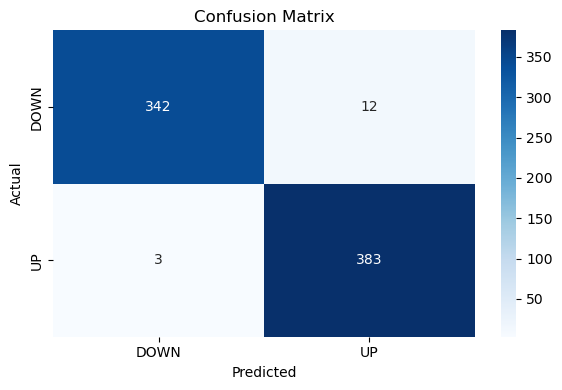

In [104]:
##check how many predictions are correct and incorrect
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrx, annot=True, fmt="d", cmap="Blues", xticklabels=["DOWN", "UP"], yticklabels=["DOWN", "UP"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()